### Assignment 3 Python
Topic : Balance Sheet analysing for Non-Banking/Financial sector sectors

In [1]:
# !which python


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.compose import make_column_selector

***To Ignore Warnings***

In [3]:
import warnings
warnings.catch_warnings()
warnings.simplefilter("ignore")

In [4]:
data = pd.read_csv("./Dataset/balance_sheets/full_non_banking.csv").drop("Id",axis=1)

In [5]:
data.head()

,Name,Catagory,Symbol,LinkQuate,BS_standalone_link,EQUITY SHARE CAPITAL,TOTAL SHARE CAPITAL,RESERVES AND SURPLUS,TOTAL RESERVES AND SURPLUS,TOTAL SHAREHOLDERS FUNDS,...,CAPITAL GOODS,EXPENDITURE IN FOREIGN CURRENCY,DIVIDEND REMITTANCE IN FOREIGN CURRENCY,FOB VALUE OF GOODS,OTHER EARNINGS,BONUS EQUITY SHARE CAPITAL,NON-CURRENT INVESTMENTS QUOTED MARKET VALUE,NON-CURRENT INVESTMENTS UNQUOTED BOOK VALUE,CURRENT INVESTMENTS QUOTED MARKET VALUE,CURRENT INVESTMENTS UNQUOTED BOOK VALUE
0,Carborundum,abrasives,CARBORUNDUM,CU,http://www.moneycontrol.com/financials/carboru...,18.94,18.94,1341.26,1341.26,1367.08,...,19.91,6.81,0.0,391.17,8.31,16.57,0.0,1.15,0.00,61.60
1,Grindwell Norto,abrasives,GRINDWELLNORTO,GN,http://www.moneycontrol.com/financials/grindwe...,55.36,55.36,1121.31,1121.31,1176.67,...,0.00,376.73,0.0,0.00,332.10,51.14,0.8,188.40,0.00,413.89
2,Orient Abrasive,abrasives,ORIENTABRASIVE,OA01,http://www.moneycontrol.com/financials/orienta...,11.97,11.97,220.55,220.55,232.52,...,0.00,11.29,0.0,71.18,0.00,10.47,0.0,0.00,0.00,0.00
3,Wendt,abrasives,WENDT,WI05,http://www.moneycontrol.com/financials/wendt(i...,2.00,2.00,117.66,117.66,119.66,...,1.63,1.37,0.0,39.77,3.48,1.50,0.0,4.31,30.93,0.00
4,Century Extr,aluminium,CENTURYEXTR,CE02,http://www.moneycontrol.com/financials/century...,8.00,8.00,42.46,42.46,50.46,...,0.00,2.80,0.0,0.05,0.00,0.00,0.0,0.00,0.00,0.00


In [6]:
data.tail()

,Name,Catagory,Symbol,LinkQuate,BS_standalone_link,EQUITY SHARE CAPITAL,TOTAL SHARE CAPITAL,RESERVES AND SURPLUS,TOTAL RESERVES AND SURPLUS,TOTAL SHAREHOLDERS FUNDS,...,CAPITAL GOODS,EXPENDITURE IN FOREIGN CURRENCY,DIVIDEND REMITTANCE IN FOREIGN CURRENCY,FOB VALUE OF GOODS,OTHER EARNINGS,BONUS EQUITY SHARE CAPITAL,NON-CURRENT INVESTMENTS QUOTED MARKET VALUE,NON-CURRENT INVESTMENTS UNQUOTED BOOK VALUE,CURRENT INVESTMENTS QUOTED MARKET VALUE,CURRENT INVESTMENTS UNQUOTED BOOK VALUE
1447,Uniinfo Telecom,telecommunicationsservice,UNIINFOTELECOM,UTS,http://www.moneycontrol.com/financials/uniinfo...,10.69,10.69,26.82,26.82,37.52,...,0.00,0.32,0.0,0.00,0.0,6.61,0.00,0.11,0.0,0.00
1448,Vodafone Idea,telecommunicationsservice,VODAFONEIDEA,IC8,http://www.moneycontrol.com/financials/vodafon...,28735.40,28735.40,-19799.70,-19799.70,9001.30,...,0.00,6817.90,0.0,0.00,1765.2,0.00,0.00,0.00,0.0,0.00
1449,Mohota Ind,textilescompositemills,MOHOTAIND,RRM,http://www.moneycontrol.com/financials/mohotai...,14.71,14.71,1.86,159.65,174.36,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,15.54,0.0,0.00
1450,Nahar Ent,textilescompositemills,NAHARENT,NIE,http://www.moneycontrol.com/financials/naharin...,40.03,146.23,606.41,606.41,752.64,...,0.00,61.02,0.0,209.55,0.0,1.60,0.01,80.23,0.0,0.00
1451,Ruby Mills,textilescompositemills,RUBYMILLS,RM04,http://www.moneycontrol.com/financials/rubymil...,8.36,8.36,464.74,464.74,473.10,...,0.53,0.53,0.0,0.70,0.0,3.33,0.00,0.00,0.0,12.02


In [7]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'catagory', 'symbol', 'linkquate', 'bs_standalone_link',
       'equity share capital', 'total share capital', 'reserves and surplus',
       'total reserves and surplus', 'total shareholders funds',
       'long term borrowings', 'deferred tax liabilities [net]',
       'other long term liabilities', 'long term provisions',
       'total non-current liabilities', 'short term borrowings',
       'trade payables', 'other current liabilities', 'short term provisions',
       'total current liabilities', 'total capital and liabilities',
       'tangible assets', 'intangible assets', 'capital work-in-progress',
       'other assets', 'fixed assets', 'non-current investments',
       'deferred tax assets [net]', 'long term loans and advances',
       'other non-current assets', 'total non-current assets',
       'current investments', 'inventories', 'trade receivables',
       'cash and cash equivalents', 'short term loans and advances',
       'othercurrentassets', 'total cu

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 53 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   name                                         1452 non-null   object 
 1   catagory                                     1452 non-null   object 
 2   symbol                                       1452 non-null   object 
 3   linkquate                                    1452 non-null   object 
 4   bs_standalone_link                           1452 non-null   object 
 5   equity share capital                         1368 non-null   float64
 6   total share capital                          1368 non-null   float64
 7   reserves and surplus                         1368 non-null   float64
 8   total reserves and surplus                   1368 non-null   float64
 9   total shareholders funds                     1368 non-null   float64
 10  

## Statistical Analysis

In [9]:
## statical information
data.describe()

,equity share capital,total share capital,reserves and surplus,total reserves and surplus,total shareholders funds,long term borrowings,deferred tax liabilities [net],other long term liabilities,long term provisions,total non-current liabilities,...,capital goods,expenditure in foreign currency,dividend remittance in foreign currency,fob value of goods,other earnings,bonus equity share capital,non-current investments quoted market value,non-current investments unquoted book value,current investments quoted market value,current investments unquoted book value
count,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,...,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1.368000e+03,1368.000000
mean,158.079839,161.643713,2493.946981,2498.526572,2664.322032,1514.826696,119.304766,358.471089,218.665782,2211.268216,...,4.803114,1010.977807,0.339474,171.031411,625.268136,47.574883,186.378808,632.340797,2.603509e+03,201.623977
std,970.381401,974.250421,14520.433694,14519.679349,14813.873810,12885.826751,1609.412888,3535.135601,3513.618053,15528.318769,...,57.216391,11148.765711,6.812689,2232.299583,8668.927627,365.190787,1927.300115,10736.336583,9.220732e+04,1513.763951
min,1.000000,1.000000,-34329.000000,-34329.000000,-32946.000000,0.000000,-6.040000,0.000000,0.000000,-0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,12.982500,13.107500,75.427500,79.350000,106.337500,0.000000,0.000000,0.070000,0.217500,13.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,25.000000,25.345000,371.425000,375.025000,419.935000,11.725000,0.000000,4.855000,2.475000,69.350000,...,0.000000,3.145000,0.000000,0.000000,0.000000,0.975000,0.000000,1.500000,0.000000e+00,0.000000
75%,71.087500,72.665000,1312.200000,1315.485000,1416.417500,138.422500,12.395000,37.122500,12.252500,303.225000,...,0.000000,76.707500,0.000000,0.000000,26.222500,10.887500,0.000000,82.577500,0.000000e+00,0.000000
max,28735.400000,28735.400000,418244.000000,418244.000000,424583.000000,286340.480000,50556.000000,80374.580000,88036.750000,286522.600000,...,1335.180000,267121.920000,224.000000,77974.000000,284196.000000,9037.980000,42534.940000,391801.000000,3.410200e+06,38216.000000


### Observations
- columns `'equity share capital'` and `'total share capital'`, and `'reserves and surplus'` and `'total reserves and surplus'` looks alot similar, moving ahead in the EDA we can visualise and see if they are very highly correlated and move ahead with taking one from the pair.
- One Interesting observation here is, the `minimum` values for some of the columns are `negative`.

### Data Exploration

Percentage of missing values:
name                                           0.000000
catagory                                       0.000000
symbol                                         0.000000
linkquate                                      0.000000
bs_standalone_link                             0.000000
equity share capital                           0.057851
total share capital                            0.057851
reserves and surplus                           0.057851
total reserves and surplus                     0.057851
total shareholders funds                       0.057851
long term borrowings                           0.057851
deferred tax liabilities [net]                 0.057851
other long term liabilities                    0.057851
long term provisions                           0.057851
total non-current liabilities                  0.057851
short term borrowings                          0.057851
trade payables                                 0.057851
other current liab

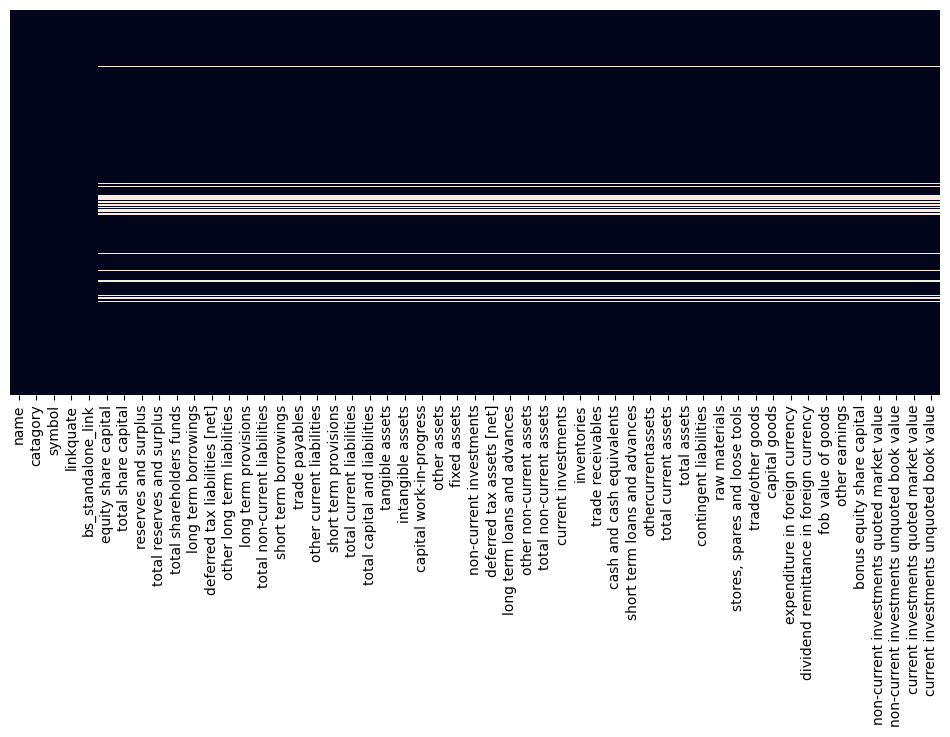

In [10]:
## Check null values
data.isnull().mean()
plt.figure(figsize=(12,5))
print(f"Percentage of missing values:\n{data.isnull().mean()}")
sns.heatmap(data.isnull(),fmt=".2f",yticklabels=False,cbar=False)
plt.show()

## Observation:
- the missing values for all columns are ~5.8% and the heat map shoes the missing values are consistent through the records, hence we can afford to completely ignore the missing values or go ahead and  impute them with a fixed value.

In [11]:
# # drop missing values
# print(f"Shape of original data: {data.shape}")
# data.dropna(inplace=True)
# print(f"Shape of data after deleting missing values: {data.shape}")

Shape of original data: (1452, 53)
Shape of data after deleting missing values: (1368, 53)


In [12]:
data.head()

,name,catagory,symbol,linkquate,bs_standalone_link,equity share capital,total share capital,reserves and surplus,total reserves and surplus,total shareholders funds,...,capital goods,expenditure in foreign currency,dividend remittance in foreign currency,fob value of goods,other earnings,bonus equity share capital,non-current investments quoted market value,non-current investments unquoted book value,current investments quoted market value,current investments unquoted book value
0,Carborundum,abrasives,CARBORUNDUM,CU,http://www.moneycontrol.com/financials/carboru...,18.94,18.94,1341.26,1341.26,1367.08,...,19.91,6.81,0.0,391.17,8.31,16.57,0.0,1.15,0.00,61.60
1,Grindwell Norto,abrasives,GRINDWELLNORTO,GN,http://www.moneycontrol.com/financials/grindwe...,55.36,55.36,1121.31,1121.31,1176.67,...,0.00,376.73,0.0,0.00,332.10,51.14,0.8,188.40,0.00,413.89
2,Orient Abrasive,abrasives,ORIENTABRASIVE,OA01,http://www.moneycontrol.com/financials/orienta...,11.97,11.97,220.55,220.55,232.52,...,0.00,11.29,0.0,71.18,0.00,10.47,0.0,0.00,0.00,0.00
3,Wendt,abrasives,WENDT,WI05,http://www.moneycontrol.com/financials/wendt(i...,2.00,2.00,117.66,117.66,119.66,...,1.63,1.37,0.0,39.77,3.48,1.50,0.0,4.31,30.93,0.00
4,Century Extr,aluminium,CENTURYEXTR,CE02,http://www.moneycontrol.com/financials/century...,8.00,8.00,42.46,42.46,50.46,...,0.00,2.80,0.0,0.05,0.00,0.00,0.0,0.00,0.00,0.00


In [13]:
## defining categorical and numerical columns

num_col_selector = make_column_selector(dtype_include='float64')
numerical_columns = num_col_selector(data)

### not including columns such as 'name', 'symbol', 'linkquate', 'bs_standalone_link' as these are merely used to indentify the records and does not contribute any thing to our analysis.
categorical_columns = ['catagory']

print(f"No. of Numerical columns:{len(numerical_columns)}")
print(f"No. of Categorical columns:{len(categorical_columns)}")


No. of Numerical columns:48
No. of Categorical columns:1


### Observation
- Not including columns such as `'name'`, `'symbol'`, `'linkquate'`, `'bs_standalone_link'` as these are merely used to indentify the records and does not contribute any thing to our analysis.


## Exploratory Data Analysis(EDA)

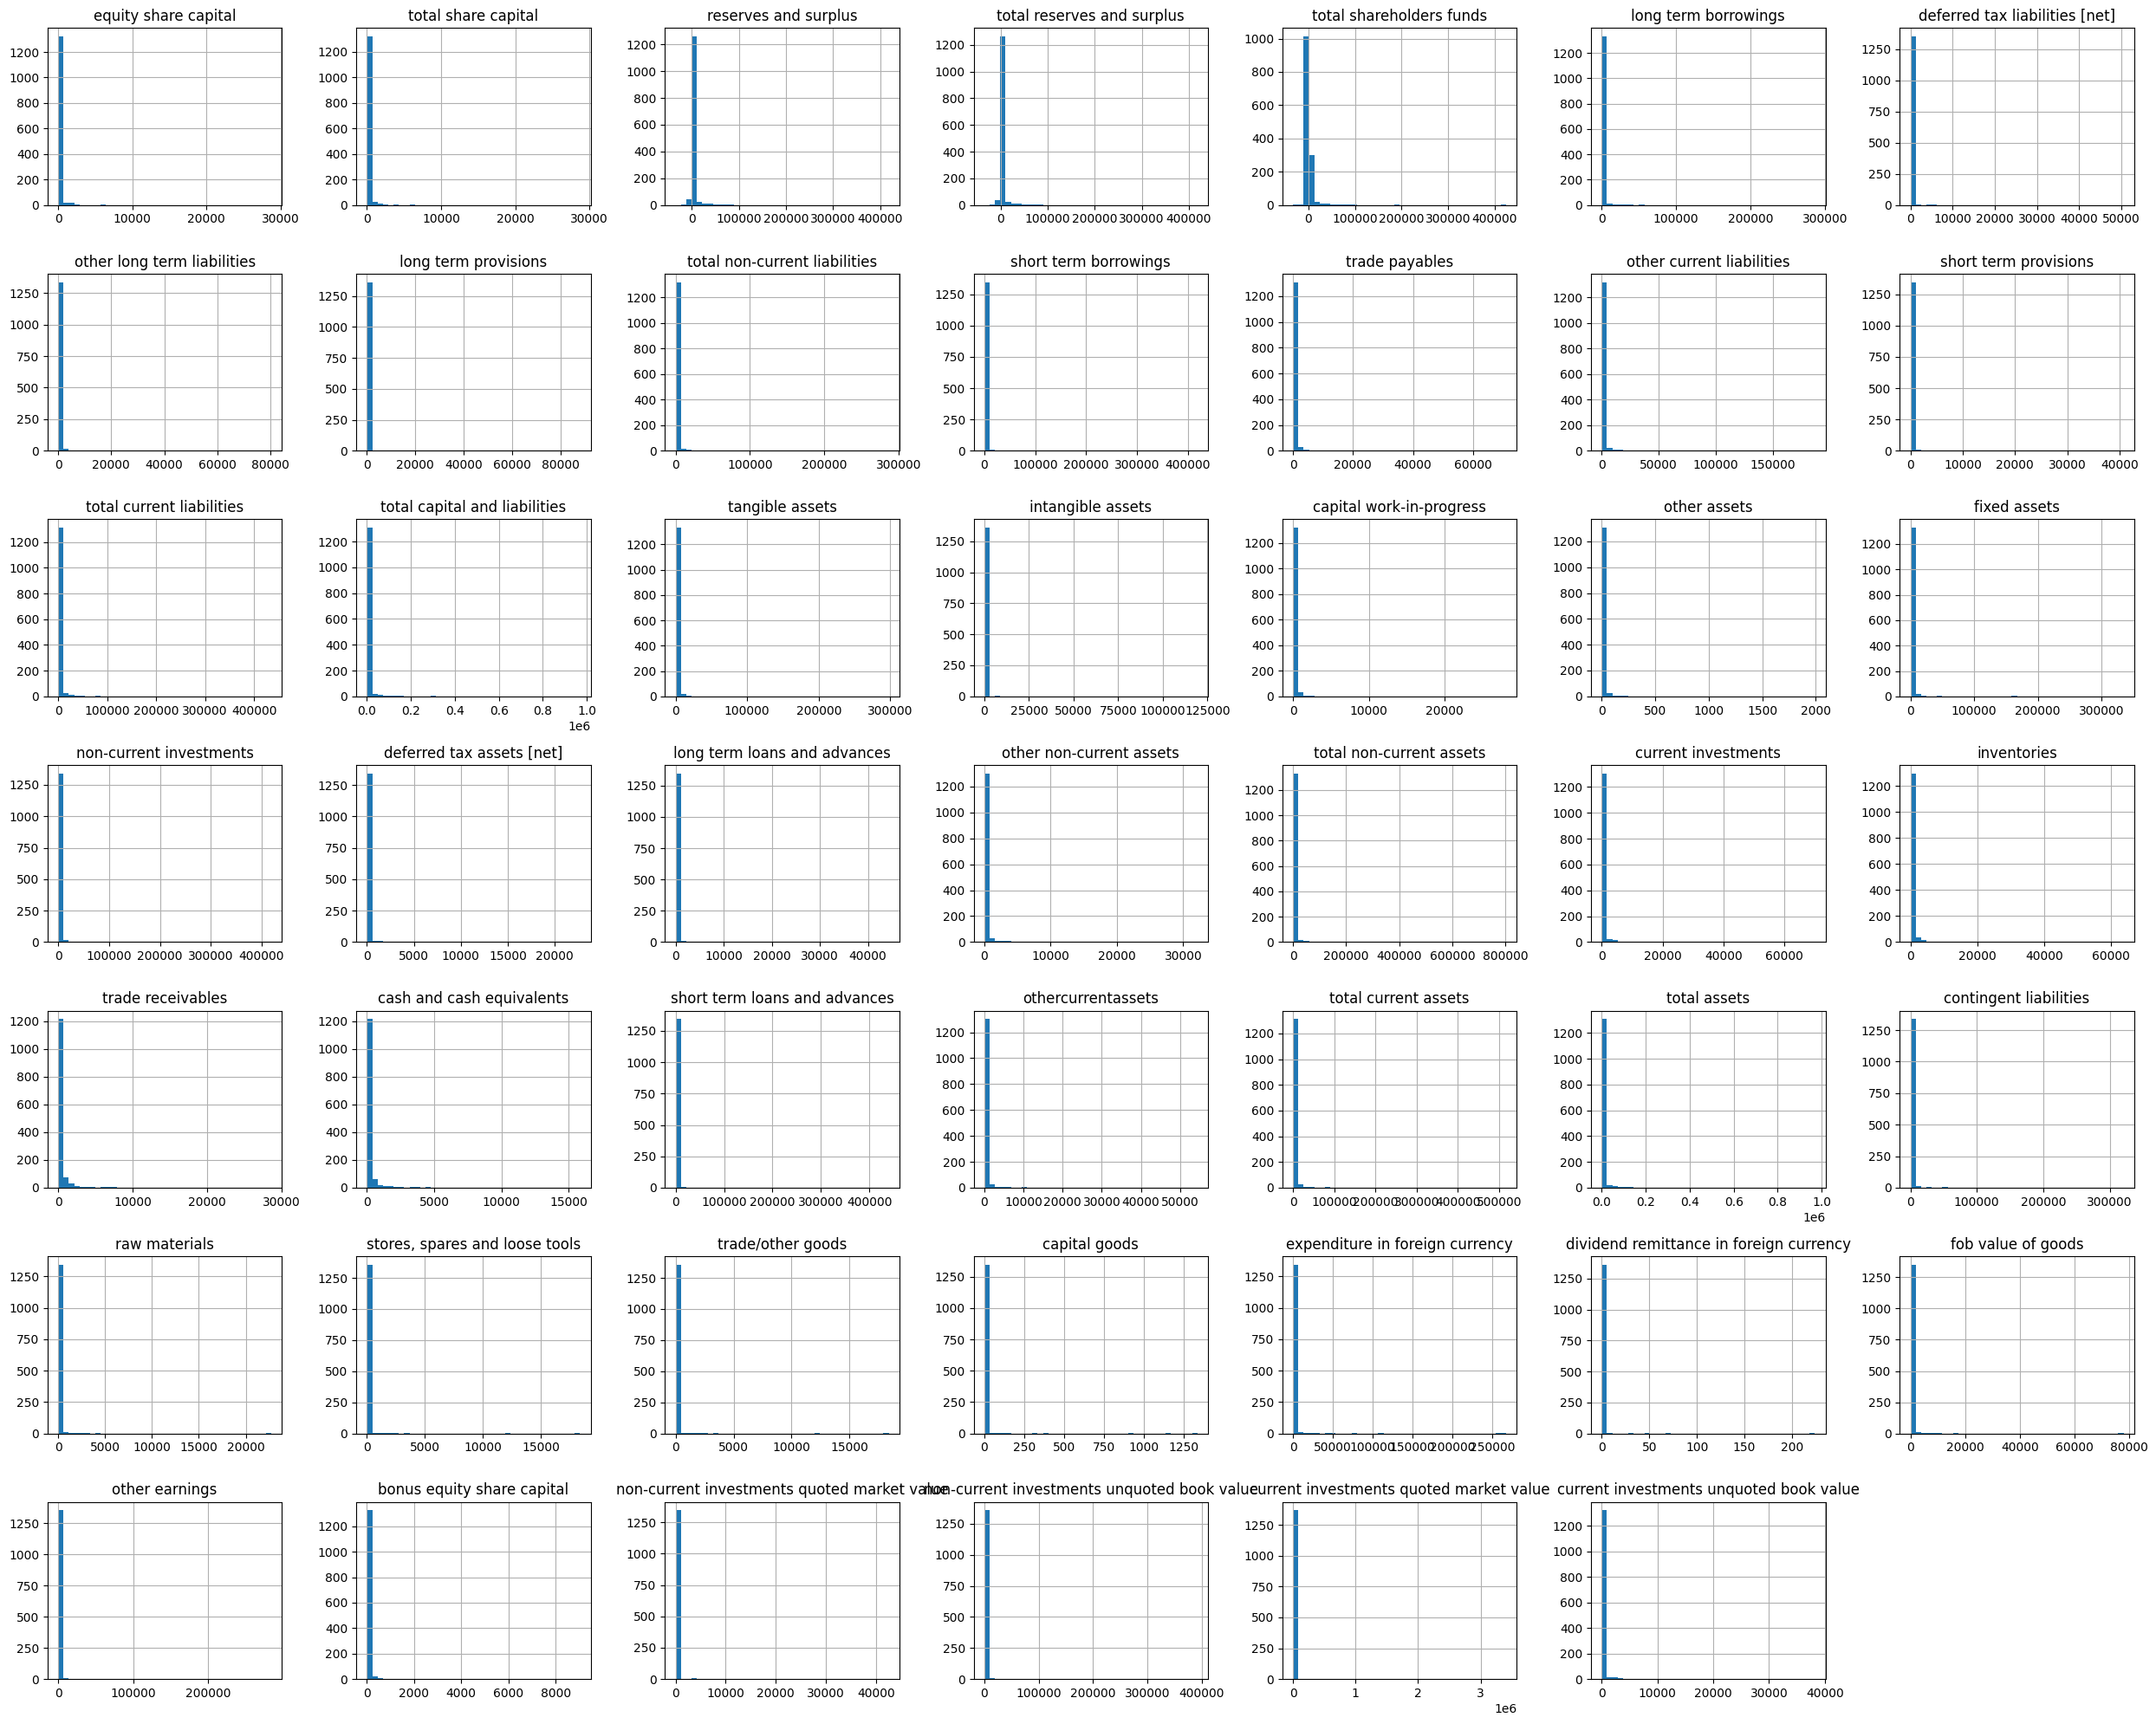

In [14]:
## visualise the data 
data.hist(bins=40,figsize=(25,20))
plt.tight_layout()
plt.show()

## Categorical Columns

In [15]:
# data['catagory'].unique()
print(f"No of Categories:{data['catagory'].nunique()}\n")
print(f"Categories:{data['catagory'].unique()}")



No of Categories:88

Categories:['abrasives' 'aluminium' 'aquaculture' 'auto23wheelers' 'autocarsjeeps'
 'autotractors' 'autoancillaries' 'bearings' 'breweriesdistilleries'
 'cablestelephone' 'castingsforgings' 'cementmajor' 'cementmini'
 'chemicals' 'cigarettes' 'compressors' 'computershardware'
 'computerssoftware' 'computerssoftwaretraining'
 'constructioncontractingcivil' 'constructioncontractinghousing'
 'constructioncontractingrealestate' 'consumergoodselectronic'
 'consumergoodswhitegoods' 'couriers' 'diversified' 'domesticappliances'
 'drycells' 'dyespigments' 'edibleoilssolventextraction'
 'electricequipment' 'electricals' 'engineering' 'engineeringheavy'
 'engines' 'textilesdenim' 'textilesgeneral' 'textilesmachinery'
 'textilesmanmade' 'textilesprocessing' 'textilesreadymadeapparels'
 'textilesspinningcottonblended' 'textilesspinningsyntheticblended'
 'textilesweaving' 'trading' 'transportlogistics' 'tyres' 'fasteners'
 'fertilisers' 'financegeneral' 'financehousing' 'financ

In [16]:
## function to set labels for plots
def plot_labels(plot, x_label=None,y_label=None,title=None):
    """
    """
    plt.figure(figsize=(8,6))
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    plot.set_title(title,fontdict={'fontsize':15})
    plt.tight_layout()



Top Categories with count:
catagory
miscellaneous                   126
pharmaceuticals                  80
chemicals                        57
autoancillaries                  56
mediaentertainment               42
constructioncontractingcivil     41
financeinvestments               40
diversified                      39
computerssoftware                36
financegeneral                   34
Name: count, dtype: int64


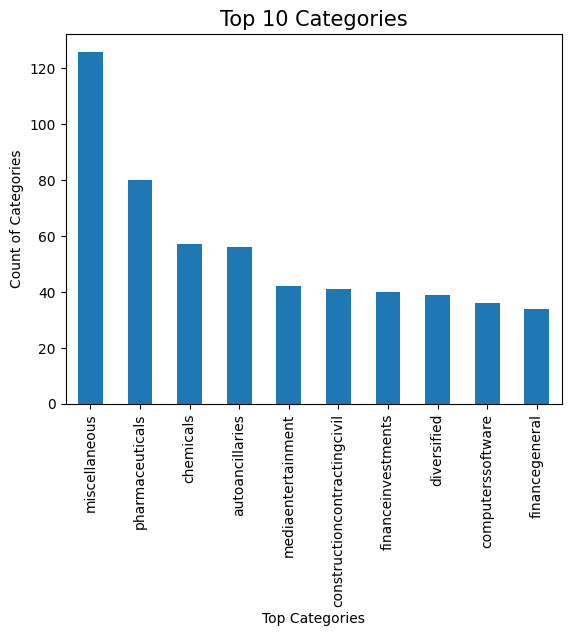

<Figure size 800x600 with 0 Axes>

In [17]:

## top 10 categories
print(f"Top Categories with count:\n{data['catagory'].value_counts().head(10)}")
fig1 = data['catagory'].value_counts().head(10).plot(kind='bar')
plot_labels(fig1,x_label='Top Categories',y_label='Count of Categories',title='Top 10 Categories')
plt.show()

## Numerical Columns

In [18]:
# for col in numerical_columns:
#     # print(col)


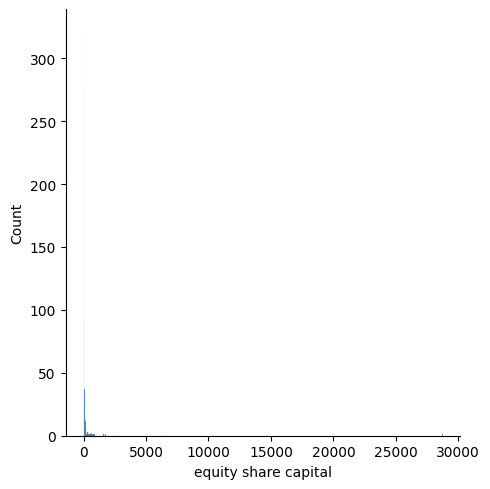

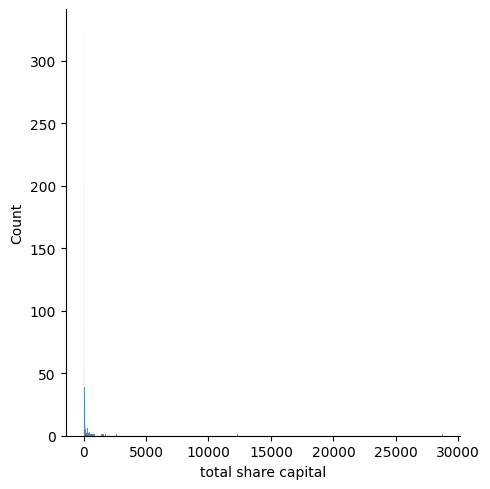

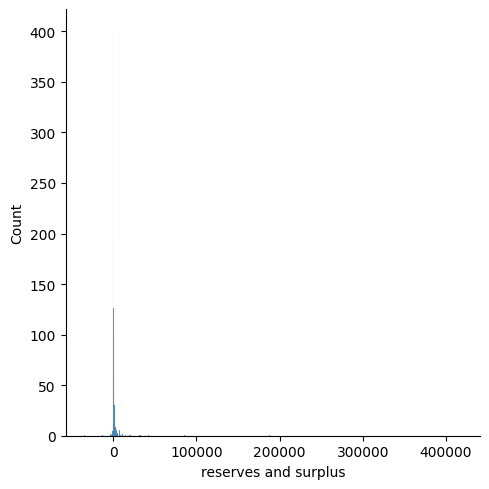

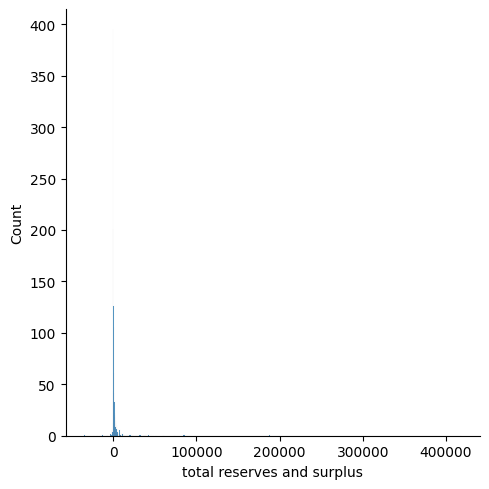

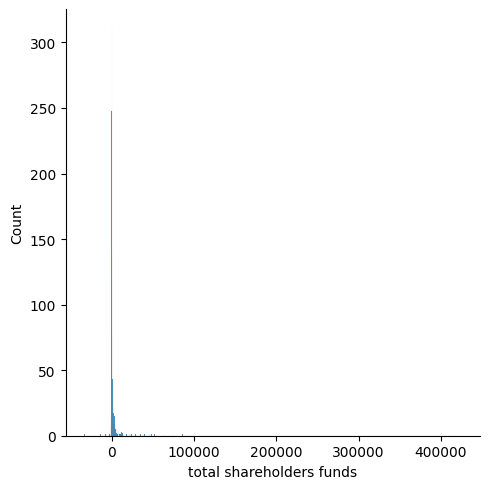

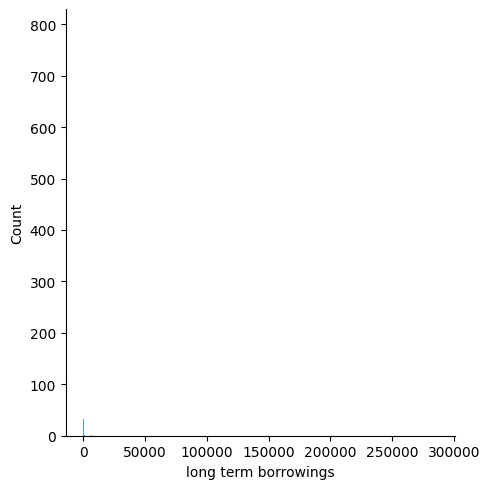

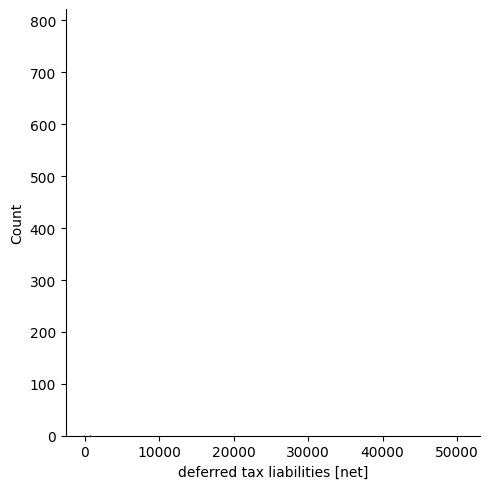

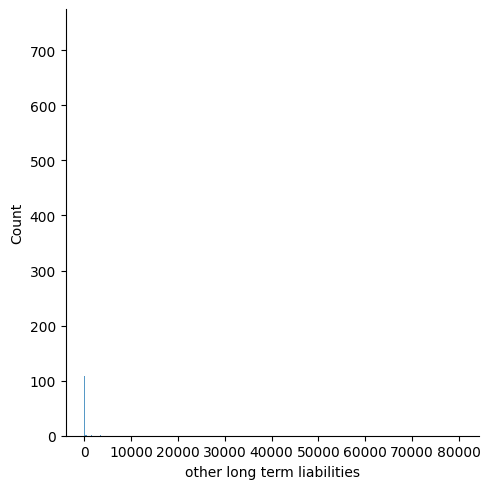

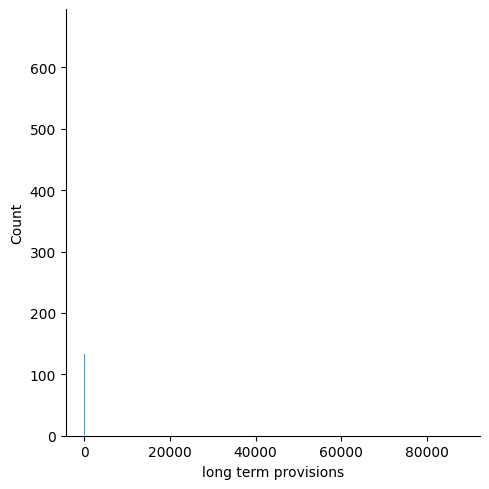

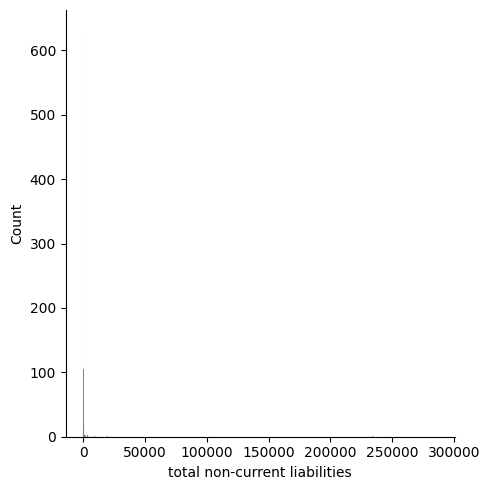

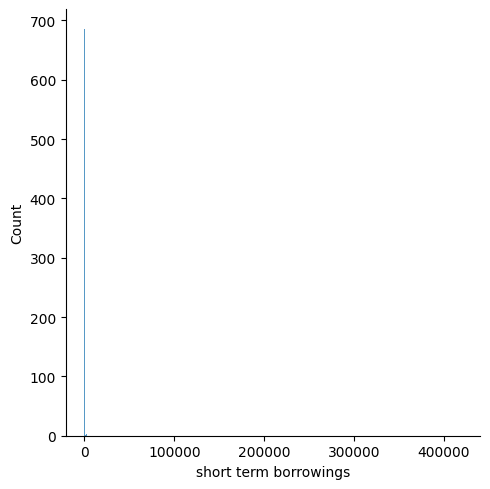

In [19]:
for col in numerical_columns[:11]:
    sns.displot(data=data,x=col)
    plt.show()

### Observation
- Plotting the first 10 columns, we can observe that there are very extreme values in the columns and simply looking at the plots we can conclude we if column to included or excluded.
- Moreover, the extereme values could be outlier or natural existing values, though we can standardization and scale the columns to counter these extreme values.

In [20]:
# ### Data selection:
# 1. Remove unnecessary columns.

In [21]:
# cat_cols

In [22]:
# corr = data[num_cols].corr()
# plt.figure(figsize=(20,20))
# sb.heatmap(corr,annot=True,fmt=".2f")
# plt.show()


To filter out the columns that are highly correlated in the given correlation matrix, you can set a correlation threshold and exclude the columns that have correlation values above this threshold. By doing so, you'll keep only the columns that have correlations below the threshold, indicating a weaker correlation.

In [23]:
# def get_correlated_columns(data_frame, threshold=0.8):
#     if not isinstance(data_frame, pd.DataFrame):
#         raise ValueError("Input must be a pandas DataFrame.")
    
#     # Calculate the correlation matrix
#     corr_matrix = data_frame.corr()
    
#     # Find highly positively correlated columns
#     highly_pos_corr_columns = corr_matrix.columns[corr_matrix.iloc[0] > threshold]
    
#     # Find highly negatively correlated columns
#     highly_neg_corr_columns = corr_matrix.columns[corr_matrix.iloc[0] < -threshold]
    
#     # Combine both lists to get the final list of columns to exclude
#     return [col for col in set(highly_pos_corr_columns).union(set(highly_neg_corr_columns))]
    


# related_cols = get_correlated_columns(data[num_cols],0.4)
# print(len(related_cols))

In [24]:
# related_cols

In [25]:

# plt.figure(figsize=(20,20))
# sb.heatmap(data[related_cols].corr(),annot=True,fmt=".2f",vmin=-1,vmax=1)
# plt.show()

In [26]:
# cols = related_cols+cat_cols

In [27]:
# X = data[]
# X.rename(columns={'catagory':'category'},inplace=True)
# X.shape

### Preprocessing data

In [43]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Data Pipeline

In [44]:
## pipeline for numerical columns

numerical_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

## pipeline for categorical columns
categorical_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder())
])

## tranformer for preprocessing both numerical and categorical columns

preprocessor = ColumnTransformer(transformers=[
    ('cat',categorical_pipeline,list(categorical_columns)),
    ('num',numerical_pipeline,list(numerical_columns))
])


### Observation
- we defined a `pipeline` for `numerical` columns where `Simple Imputer` is used to impute the missing values with the `median` of the column as seen earlier all columns have extreme values, hence taking the mean won't be ideal as the mean is affected by these extereme values.

- Numerical columns are `standardized` using the `standard scaller`, which scalles the values using `z-score`. 

- For categorical columns, we have defined simple imputer to impute missing values with `most_frequent`(mode) values, though we do not have any missing values for categories, we still want to create a generalised pipeline assuming there might be missing values in unseen data.

- We have used `OrdinalEncoder` to convert categories into numerical form, we have specifically used OridinalEncoder as we have `88` distinct categories in the category columns, hence using `OneHotEncoding` is not ideal as will create 87 new columns. Similarly, since the categories does not have any order, therefore we not used `LabelEncoder` which labels the categories in a order.

In [51]:
X = data[numerical_columns+categorical_columns]
print(f"shape of data before processing:{X.shape}\n")
X_transformed = preprocessor.fit_transform(X)
print(f"shape of data after preprocessing:{X_transformed.shape}")


shape of data before processing:(1368, 49)

shape of data after preprocessing:(1368, 49)


### Transform into different dimentials

In [52]:
from sklearn.manifold import TSNE
tnse = TSNE(n_components=2,n_jobs=-1)
bs_2d_tr = tnse.fit_transform(X_transformed)
bs_2d_tr.shape

(1368, 2)

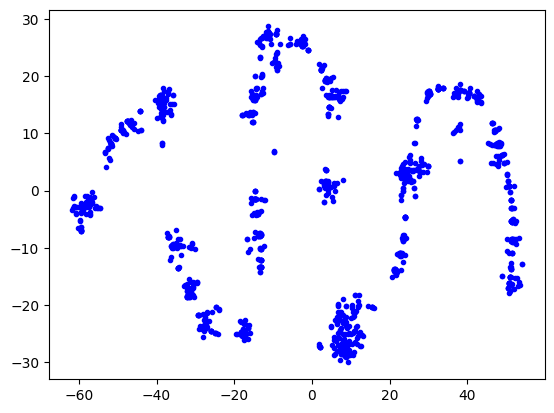

In [53]:
plt.plot(bs_2d_tr[:,0],bs_2d_tr[:,1],"b.")

### Apply Kmean clusting 

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(bs_2d_tr)

KMeans(n_clusters=6)

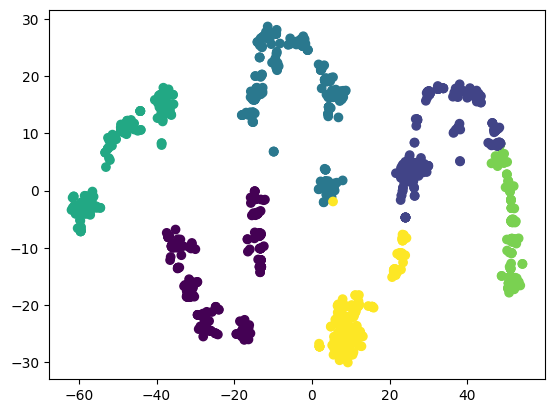

In [55]:
plt.scatter(bs_2d_tr[:,0],bs_2d_tr[:,1],c=kmeans.labels_)

### Apply DB Scan algorithm

In [56]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(n_jobs=-1)
clusters = dbscan.fit_predict(X_transformed)

In [57]:
np.unique(clusters,return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54]),
 array([504,  47,   7,   7,   9,  11,   5,  46,   9,  23,   6,  25,  12,
          6,  22,  12,   7,  18,   6,  15,  13,   9,   6,   6,  17,  18,
          5,   8,  15,  23,  29,   7,  16,  10,  18,  10,   7,  28,   6,
        100,   5,  18,  17,   6,   8,  57,  12,  21,  12,   5,   6,   5,
         12,   8,  23,   5]))

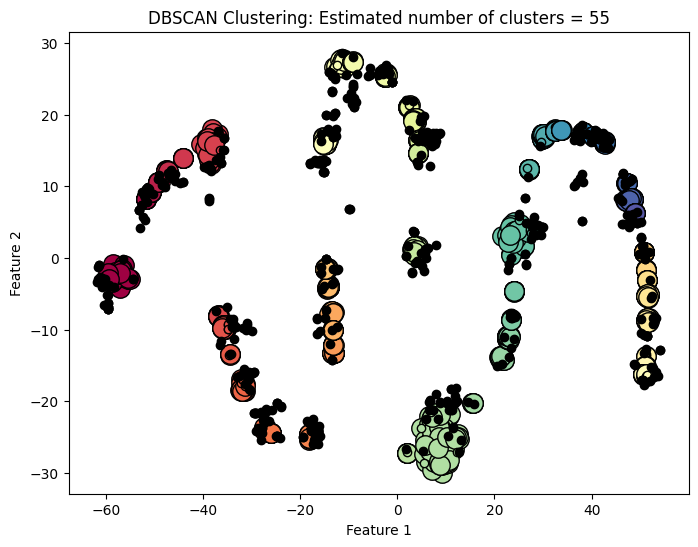

In [58]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot the DBSCAN result
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = bs_2d_tr[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = bs_2d_tr[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title(f"DBSCAN Clustering: Estimated number of clusters = {n_clusters_}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [59]:
def plot_dbscan(dbscan,X = X,size=400):
    core_mask = np.zeros_like(dbscan.labels_,dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anormal_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anormal_mask)
    plt.scatter(X[anormal_mask,0],X[anormal_mask,1],marker="x",color='r',s=50,label="anormal")
    plt.scatter(X[core_mask,0],X[core_mask,1],c=dbscan.labels_[core_mask])
    plt.scatter(X[core_mask,0],X[core_mask,1],c=dbscan.labels_[core_mask],s=size,cmap=plt.cm.Paired,zorder=-1,alpha=.4)
    plt.scatter(X[non_core_mask,0],X[non_core_mask,1],marker=".",c=dbscan.labels_[non_core_mask])
    plt.legend()
    plt.title("eps={:.2f} min_sample={}".format(dbscan.eps,dbscan.min_samples))

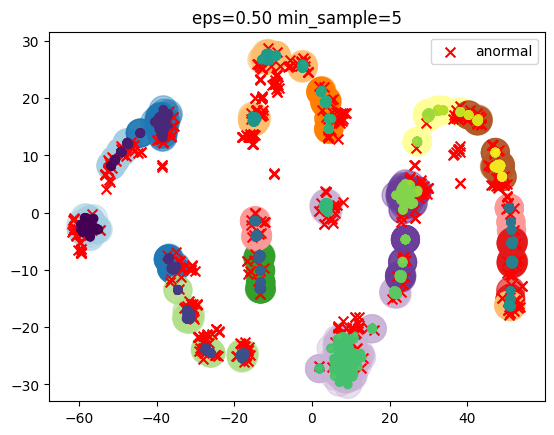

In [60]:
plot_dbscan(dbscan,bs_2d_tr)

### 

In [61]:
from sklearn.cluster import MiniBatchKMeans
import time
ks = range(1,50)
r_inertias = []
m_inertias = []

r_times = []
m_times = []

for k in ks:
    miniKmean = MiniBatchKMeans(n_clusters=k)
    regular_kmean = KMeans(n_clusters=k)
    t1 = time.time()
    regular_kmean.fit(bs_2d_tr)
    t2 = time.time()
    r_times.append(t2-t1)
    r_inertias.append(regular_kmean.inertia_)
    t1 = time.time()
    miniKmean.fit(bs_2d_tr)
    t2 = time.time()
    m_times.append(t2-t1)
    m_inertias.append(miniKmean.inertia_)
    

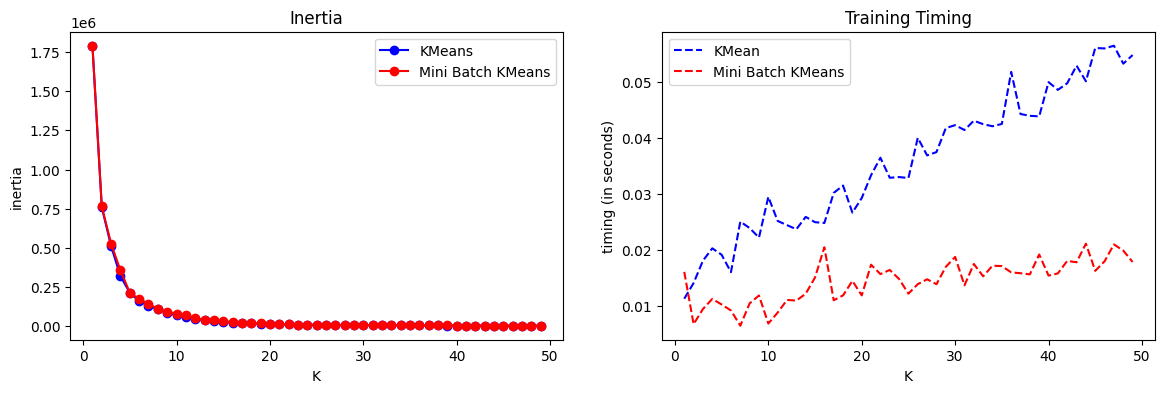

In [62]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(ks,r_inertias,'bo-',label="KMeans")
plt.plot(ks,m_inertias,'ro-',label="Mini Batch KMeans")
plt.title("Inertia")
plt.xlabel("K")
plt.ylabel("inertia")
plt.legend()
plt.subplot(122)
plt.plot(ks,r_times,"b--",label="KMean")
plt.plot(ks,m_times,"r--",label="Mini Batch KMeans")
plt.title("Training Timing")
plt.xlabel("K")
plt.ylabel("timing (in seconds)")
plt.legend()

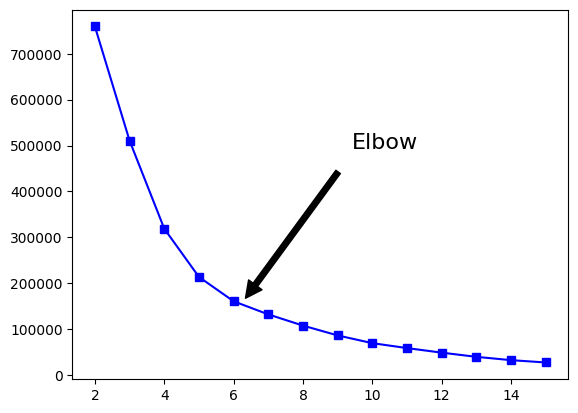

In [63]:
plt.plot(ks[1:15],r_inertias[1:15],"bs-")
plt.annotate("Elbow",xy=[6,r_inertias[6]],xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

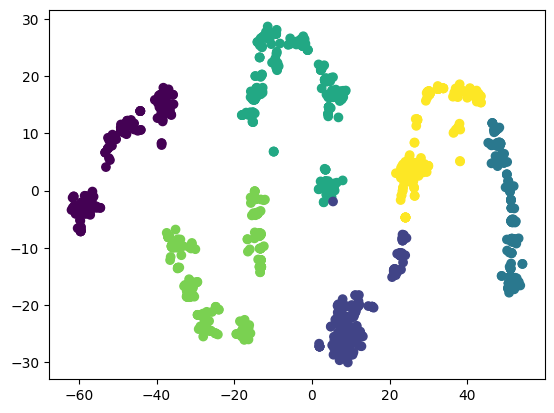

In [64]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(bs_2d_tr)
plt.scatter(bs_2d_tr[:,0],bs_2d_tr[:,1],c=kmeans.labels_)


In [65]:
from sklearn.metrics import silhouette_score
ks = range(2,10)
silhouetes = []
for k in ks:
    km = KMeans(n_clusters=k)
    km.fit(bs_2d_tr)
    silhouetes.append(silhouette_score(bs_2d_tr,km.labels_))

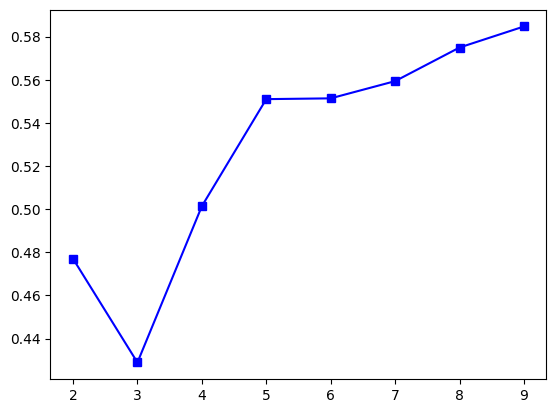

In [66]:
plt.plot(ks,silhouetes,"bs-")

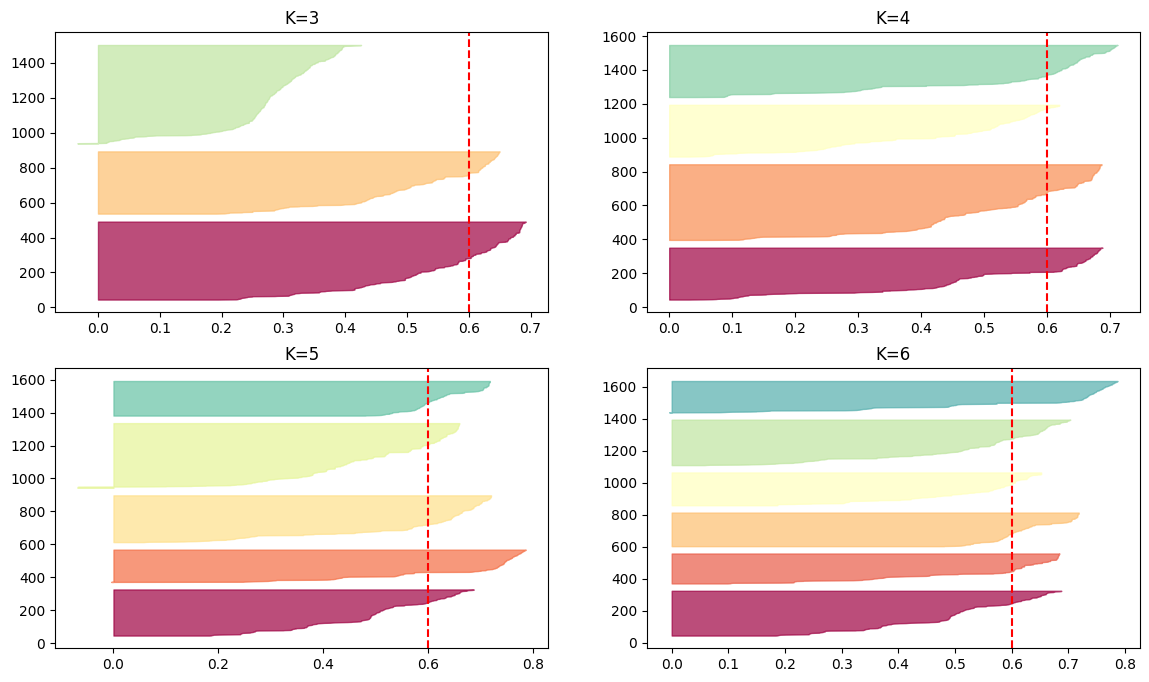

In [67]:
from sklearn.metrics import silhouette_samples
plt.figure(figsize=(14,8))
for k in (3,4,5,6):
    plt.subplot(2,2,k-2)
    k3 = KMeans(n_clusters=k)
    ypred = k3.fit_predict(bs_2d_tr)
    padding = len(bs_2d_tr)//30
    pos = padding
    silhouete_coef = silhouette_samples(bs_2d_tr,ypred)
    for i in range(k):
        coef = silhouete_coef[ypred==i]
        coef.sort()
        color = plt.cm.Spectral(i/k)
        plt.fill_betweenx(np.arange(pos,pos+len(coef)),0,coef,facecolor=color,edgecolor=color,alpha=.7)
        pos += len(coef) +padding
    plt.axvline(x=0.6,linestyle="--",color="red")
    plt.title("K="+str(k))